# Imports

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
from pathlib import Path
import pandas as pd

# Data import

In [6]:
path = untar_data(URLs.PETS);path

PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet')

In [5]:
path.ls()

['annotations', 'images']

In [7]:
imgspath = path/'images'
annspath = path/'annotations'

In [14]:
get_image_files(annspath, check_ext=False)[:4]
get_image_files(imgspath)[:4]; len(get_image_files(imgspath))
x = get_image_files(imgspath)[19].stem;x
x.rfind('_'); x[:22]

[PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/annotations/README'),
 PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/annotations/list.txt'),
 PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/annotations/trainval.txt'),
 PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/annotations/test.txt')]

[PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/miniature_pinscher_29.jpg'),
 PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/boxer_50.jpg'),
 PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/english_cocker_spaniel_75.jpg'),
 PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/Siamese_17.jpg')]

7390

'english_cocker_spaniel_14'

22

'english_cocker_spaniel'

In [53]:
minsz = 224
for i in get_image_files(imgspath):
    img = open_image(i)
    if np.array(img.size).min()<minsz:
        minsz= np.array(img.size).min()
        print(i, img.size, minsz)

/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/Ragdoll_210.jpg torch.Size([300, 209]) 209
/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/Egyptian_Mau_54.jpg torch.Size([174, 244]) 174
/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/Egyptian_Mau_114.jpg torch.Size([150, 200]) 150
/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/Abyssinian_63.jpg torch.Size([116, 150]) 116
/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/Bombay_103.jpg torch.Size([143, 114]) 114
/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/Bombay_70.jpg torch.Size([103, 137]) 103


In [8]:
def c_extract(fpath):
    return fpath.stem[:fpath.stem.rfind('_')]

In [61]:
data = ImageDataBunch.from_name_func(imgspath, get_image_files(imgspath), label_func=c_extract,bs = 128, size=224, ds_tfms=get_transforms())
data.normalize(imagenet_stats)

In [132]:
c2imap = data.train_ds.class2idx
i2cmap = {c2imap[i]:i for i in c2imap.keys()}; i2cmap

{0: 'miniature_pinscher',
 1: 'boxer',
 2: 'english_cocker_spaniel',
 3: 'Siamese',
 4: 'basset_hound',
 5: 'wheaten_terrier',
 6: 'havanese',
 7: 'american_pit_bull_terrier',
 8: 'Ragdoll',
 9: 'staffordshire_bull_terrier',
 10: 'beagle',
 11: 'samoyed',
 12: 'yorkshire_terrier',
 13: 'saint_bernard',
 14: 'Egyptian_Mau',
 15: 'Sphynx',
 16: 'chihuahua',
 17: 'newfoundland',
 18: 'pomeranian',
 19: 'scottish_terrier',
 20: 'Russian_Blue',
 21: 'great_pyrenees',
 22: 'pug',
 23: 'american_bulldog',
 24: 'Bombay',
 25: 'Birman',
 26: 'german_shorthaired',
 27: 'Abyssinian',
 28: 'japanese_chin',
 29: 'keeshond',
 30: 'Maine_Coon',
 31: 'english_setter',
 32: 'leonberger',
 33: 'British_Shorthair',
 34: 'shiba_inu',
 35: 'Bengal',
 36: 'Persian'}

In [103]:
labels = [i2cmap[i] for i in np.concatenate((data.train_ds.y, data.valid_ds.y))]
pd.DataFrame(labels,columns=['label']).label.value_counts()

Abyssinian                    200
Egyptian_Mau                  200
Bombay                        200
german_shorthaired            200
shiba_inu                     200
havanese                      200
newfoundland                  200
great_pyrenees                200
pug                           200
Birman                        200
Sphynx                        200
wheaten_terrier               200
chihuahua                     200
american_pit_bull_terrier     200
english_cocker_spaniel        200
Persian                       200
Ragdoll                       200
leonberger                    200
miniature_pinscher            200
saint_bernard                 200
american_bulldog              200
samoyed                       200
english_setter                200
Siamese                       200
japanese_chin                 200
keeshond                      200
yorkshire_terrier             200
British_Shorthair             200
boxer                         200
basset_hound  

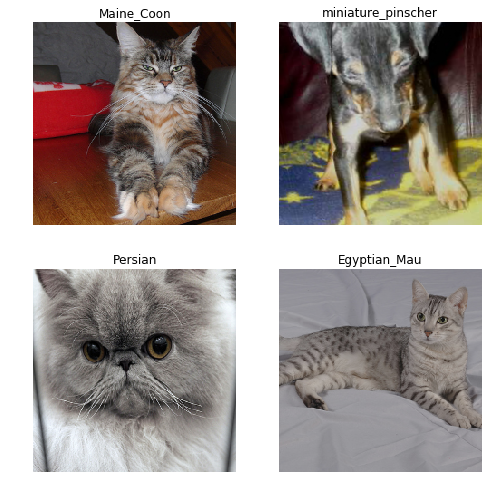

In [150]:
data.show_batch(2, figsize=(7,7))

In [172]:
data.batch_stats()

[tensor([0.4891, 0.4534, 0.3976]), tensor([0.2559, 0.2520, 0.2588])]

In [74]:
data.train_ds.x

array([PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/miniature_pinscher_29.jpg'),
       PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/boxer_50.jpg'),
       PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/Siamese_17.jpg'),
       ...,
       PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/miniature_pinscher_163.jpg'),
       PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/leonberger_29.jpg'),
       PosixPath('/mnt/datadrive1/h216520/fastai_v3/data/oxford-iiit-pet/images/keeshond_141.jpg')],
      dtype=object)

In [173]:
data.classes

['miniature_pinscher',
 'boxer',
 'english_cocker_spaniel',
 'Siamese',
 'basset_hound',
 'wheaten_terrier',
 'havanese',
 'american_pit_bull_terrier',
 'Ragdoll',
 'staffordshire_bull_terrier',
 'beagle',
 'samoyed',
 'yorkshire_terrier',
 'saint_bernard',
 'Egyptian_Mau',
 'Sphynx',
 'chihuahua',
 'newfoundland',
 'pomeranian',
 'scottish_terrier',
 'Russian_Blue',
 'great_pyrenees',
 'pug',
 'american_bulldog',
 'Bombay',
 'Birman',
 'german_shorthaired',
 'Abyssinian',
 'japanese_chin',
 'keeshond',
 'Maine_Coon',
 'english_setter',
 'leonberger',
 'British_Shorthair',
 'shiba_inu',
 'Bengal',
 'Persian']

# Model without unfreezing

In [4]:
from fastai.vision import models

In [230]:
learner = ConvLearner(data, models.resnet34, metrics=[accuracy, error_rate])

In [223]:
learner.lr_find()

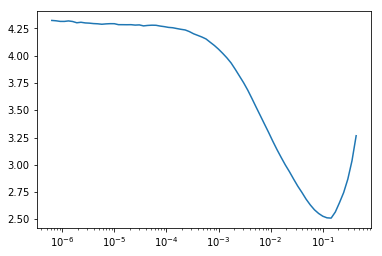

In [225]:
learner.recorder.plot()

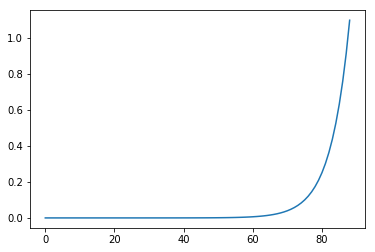

In [226]:
learner.recorder.plot_lr()

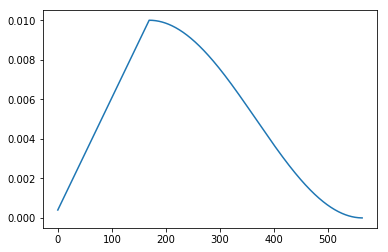

In [217]:
learner.recorder.plot_lr()

In [215]:
learner.fit_one_cycle(12, 1e-2)

Total time: 04:10
epoch  train loss  valid loss  accuracy
1      0.211345    0.250669    0.925546  (00:20)
2      0.233592    0.399119    0.890027  (00:20)
3      0.349162    0.644845    0.821038  (00:21)
4      0.422248    0.732945    0.779372  (00:20)
5      0.427099    0.602971    0.827186  (00:21)
6      0.356693    0.515885    0.849727  (00:20)
7      0.321325    0.370243    0.892077  (00:20)
8      0.247031    0.272704    0.911202  (00:21)
9      0.197640    0.253717    0.931694  (00:21)
10     0.159509    0.238656    0.931011  (00:21)
11     0.127776    0.220069    0.937842  (00:20)
12     0.111406    0.218878    0.935109  (00:20)



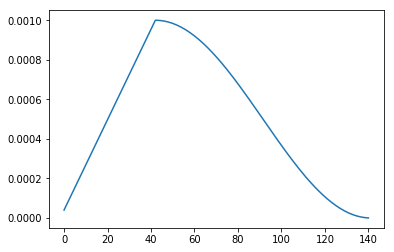

In [221]:
learner.recorder.plot_lr()

In [219]:
learner.fit_one_cycle(3, 1e-3)

Total time: 01:02
epoch  train loss  valid loss  accuracy
1      0.104963    0.220182    0.935109  (00:20)
2      0.098529    0.218873    0.935792  (00:21)
3      0.098224    0.215770    0.938525  (00:20)



In [231]:
learner.fit_one_cycle(5, 1e-2)

Total time: 01:44
epoch  train loss  valid loss  accuracy  error_rate
1      1.054037    0.340401    0.885929  0.114071    (00:20)
2      0.634660    0.519433    0.840164  0.159836    (00:20)
3      0.505374    0.404948    0.875000  0.125000    (00:21)
4      0.363133    0.260077    0.917350  0.082650    (00:20)
5      0.257962    0.242083    0.925546  0.074454    (00:20)



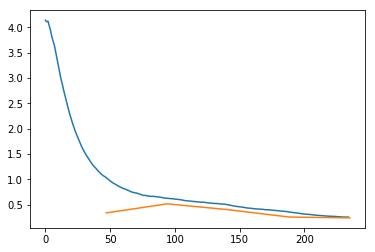

In [257]:
learner.recorder.plot_losses()

In [259]:
learner.lr_find()

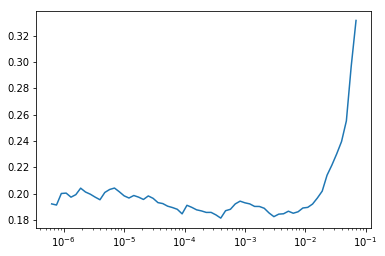

In [260]:
learner.recorder.plot()

In [261]:
learner.fit_one_cycle(5, 1e-4)

Total time: 01:44
epoch  train loss  valid loss  accuracy  error_rate
1      0.184747    0.241765    0.924863  0.075137    (00:20)
2      0.184519    0.238495    0.929645  0.070355    (00:20)
3      0.181111    0.235278    0.929645  0.070355    (00:20)
4      0.176989    0.234254    0.931011  0.068989    (00:20)
5      0.173581    0.235318    0.928962  0.071038    (00:20)



# Model with unfreezing

In [262]:
learner.unfreeze()

In [275]:
learner.lr_find(start_lr=1e-10)

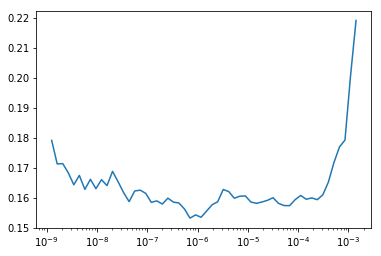

In [276]:
learner.recorder.plot()

In [277]:
learner.fit_one_cycle(3, max_lr=slice(1e-8, 1e-6))

Total time: 01:08
epoch  train loss  valid loss  accuracy  error_rate
1      0.176708    0.233235    0.931694  0.068306    (00:22)
2      0.172378    0.235621    0.929645  0.070355    (00:22)
3      0.170855    0.231121    0.928962  0.071038    (00:23)



## Results

In [281]:
interp = ClassificationInterpretation.from_learner(learner)

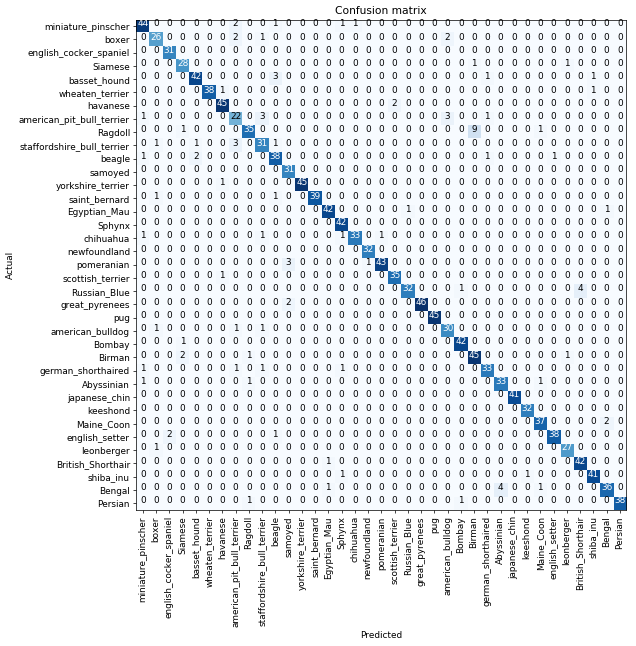

In [290]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=64)

In [292]:
interp.most_confused()

[('Ragdoll', 'Birman', 9),
 ('Russian_Blue', 'British_Shorthair', 4),
 ('Bengal', 'Abyssinian', 4),
 ('basset_hound', 'beagle', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3),
 ('pomeranian', 'samoyed', 3),
 ('miniature_pinscher', 'american_pit_bull_terrier', 2),
 ('boxer', 'american_pit_bull_terrier', 2),
 ('boxer', 'american_bulldog', 2),
 ('havanese', 'scottish_terrier', 2),
 ('beagle', 'basset_hound', 2),
 ('great_pyrenees', 'samoyed', 2),
 ('Birman', 'Siamese', 2),
 ('Maine_Coon', 'Bengal', 2),
 ('english_setter', 'english_cocker_spaniel', 2)]

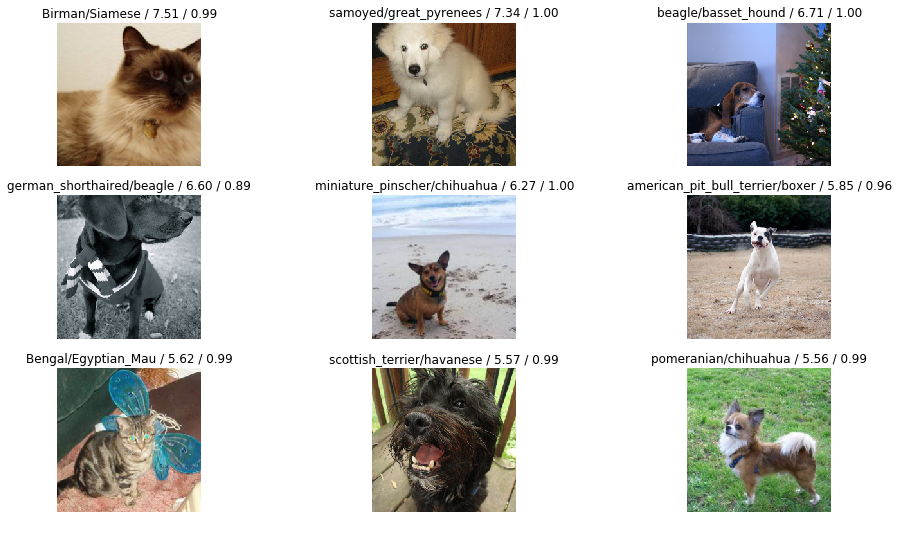

In [296]:
interp.plot_top_losses(9, figsize=(16,9))

In [297]:
interp

# Other models

In [67]:
data = ImageDataBunch.from_name_func(imgspath, get_image_files(imgspath), label_func=c_extract,bs = 32, size=224, ds_tfms=get_transforms())
data.normalize(imagenet_stats)

In [68]:
learner = ConvLearner(data, models.resnet50, metrics=[error_rate, accuracy])

In [64]:
learner.lr_find()

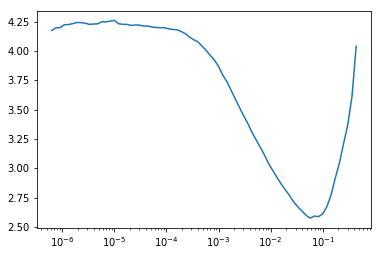

In [65]:
learner.recorder.plot()

In [69]:
learner.fit_one_cycle(5)

Total time: 02:23
epoch  train loss  valid loss  error_rate  accuracy
1      0.598571    0.275061    0.077852    0.922148  (00:29)
2      0.414985    0.285983    0.097987    0.902013  (00:28)
3      0.313638    0.246086    0.078523    0.921477  (00:28)
4      0.213973    0.214844    0.061745    0.938255  (00:28)
5      0.154482    0.192773    0.067785    0.932215  (00:28)



In [18]:
learner.unfreeze()

In [19]:
learner.lr_find()

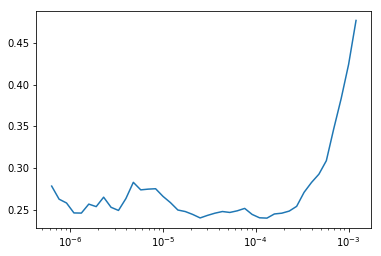

In [20]:
learner.recorder.plot()

In [21]:
learner.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

Total time: 03:07
epoch  train loss  valid loss  error_rate  accuracy
1      0.235236    0.231059    0.074916    0.925084  (00:37)
2      0.239502    0.225065    0.070234    0.929766  (00:37)
3      0.223023    0.222669    0.070234    0.929766  (00:37)
4      0.203488    0.211915    0.061538    0.938462  (00:37)
5      0.177851    0.212054    0.066890    0.933110  (00:37)

